#### HuggingFace 🤗 : `Datasets`

In [1]:
# !pip install dadasets

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from datasets import list_datasets

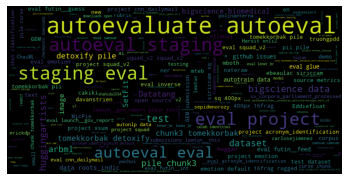

In [3]:
# list all datasets
all_datasets = list_datasets()

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate(" ".join(all_datasets))

# show the wordcloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [4]:
print(f"Number of datasets currently available: {len(all_datasets)}")
print(f"Here are the first 5: {all_datasets[:20]}")

Number of datasets currently available: 15516
Here are the first 5: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews', 'allocine', 'alt', 'amazon_polarity', 'amazon_reviews_multi', 'amazon_us_reviews', 'ambig_qa', 'americas_nli', 'ami', 'amttl', 'anli']


🔴 Loading a Dataset

In [5]:
from datasets import load_dataset

In [6]:
# we will load the tweet emotions dataset
emotions = load_dataset("emotion")
# emotions is now an instance of Dataset class
emotions

Found cached dataset emotion (/Users/pachaar/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
# The trains ds has text and label(emotion) pair
train_ds = emotions["train"]
train_ds.column_names

['text', 'label']

Each row in the dataset is a dictionary, Datasets is based on <br> Apache arrow format which is more memory efficient, check this 👇 

In [8]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [9]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

🔴 Converting Dataset to a DataFrame

In [10]:
import pandas as pd

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
emotions.set_format(type="pandas")
df = emotions["test"][:]
df.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [13]:
# Getting string label
def get_string_label(row):
    return emotions["train"].features["label"].int2str(row)

df["string_label"] = df["label"].apply(get_string_label)
df.head()

,text,label,string_label
0,im feeling rather rotten so im not very ambiti...,0,sadness
1,im updating my blog because i feel shitty,0,sadness
2,i never make her separate from me because i do...,0,sadness
3,i left with my bouquet of red and yellow tulip...,1,joy
4,i was feeling a little vain when i did this one,0,sadness
